In [65]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [66]:
import tensorflow as tf
from tensorflow import keras

In [67]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

In [69]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [70]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

In [71]:
X_valid, X_train = X_train_n[0:5000], X_train_n[5000:], 
y_vaild, y_train = y_train_full[0:5000], y_train_full[5000:],
X_test = X_test_n

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size = (3,3),strides=1, padding = "valid", activation ="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [74]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [75]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [76]:
model_history = model.fit(X_train,y_train,epochs=30, batch_size = 64, validation_data = (X_valid,y_vaild))

Epoch 1/30
860/860 [==============================] - 34s 37ms/step - loss: 1.2805 - accuracy: 0.5730 - val_loss: 0.7489 - val_accuracy: 0.7368
Epoch 2/30
 10/860 [..............................] - ETA: 48s - loss: 0.7305 - accuracy: 0.7490

KeyboardInterrupt: 

In [77]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 860}

In [78]:
model.history.history

{'loss': [0.8766923546791077],
 'accuracy': [0.6991817951202393],
 'val_loss': [0.7489014863967896],
 'val_accuracy': [0.7368000149726868]}

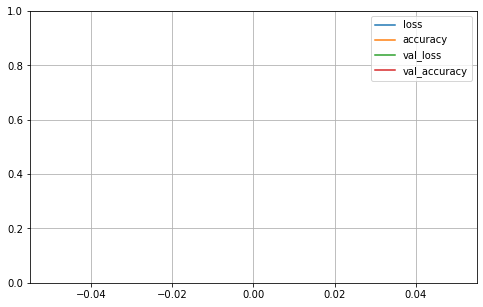

In [79]:
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [80]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6219 - accuracy: 0.7809


[0.6218505501747131, 0.7809000015258789]

In [ ]:
X_new=X_test[:3]

In [ ]:
y_proba=model.predict(X_new)
y_proba.round(3)

In [ ]:
y_pred=model.predict_classes(X_new)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
print(plt.imshow(X_test[0]))

In [ ]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


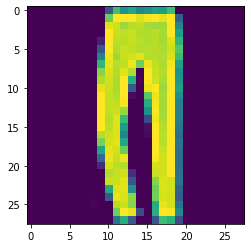

In [82]:
print(plt.imshow(X_test[2]))

In [89]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32, kernel_size = (3,3),strides=1, padding = "valid", activation ="relu",input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))

model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300,activation="relu"))
model_a.add(keras.layers.Dense(100,activation="relu"))
model_a.add(keras.layers.Dense(10,activation="softmax"))


model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=32, kernel_size = (3,3),strides=1, padding = "valid", activation ="relu",input_shape=(28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300,activation="relu"))
model_b.add(keras.layers.Dense(100,activation="relu"))
model_b.add(keras.layers.Dense(10,activation="softmax"))

In [90]:
model_a.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 300)               1622700   
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
___________________________________________

In [91]:
model_b.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_11 (Flatten)         (None, 21632)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 300)               6489900   
_________________________________________________________________
dense_34 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [92]:
model_a.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [94]:
model_history_a = model_a.fit(X_train,y_train,epochs=3, batch_size = 64, validation_data = (X_valid,y_vaild))

Epoch 1/3
860/860 [==============================] - 40s 46ms/step - loss: 0.7295 - accuracy: 0.7443 - val_loss: 0.6933 - val_accuracy: 0.7484
Epoch 2/3
860/860 [==============================] - 30s 35ms/step - loss: 0.5310 - accuracy: 0.8072 - val_loss: 0.4861 - val_accuracy: 0.8208
Epoch 3/3
860/860 [==============================] - 31s 36ms/step - loss: 0.4775 - accuracy: 0.8276 - val_loss: 0.9114 - val_accuracy: 0.6984


In [95]:
model_history_b = model_b.fit(X_train,y_train,epochs=3, batch_size = 64, validation_data = (X_valid,y_vaild))

Epoch 1/3
860/860 [==============================] - 58s 67ms/step - loss: 1.0323 - accuracy: 0.6499 - val_loss: 0.7582 - val_accuracy: 0.7178
Epoch 2/3
860/860 [==============================] - 58s 67ms/step - loss: 0.5320 - accuracy: 0.8090 - val_loss: 0.4619 - val_accuracy: 0.8320
Epoch 3/3
860/860 [==============================] - 68s 79ms/step - loss: 0.4640 - accuracy: 0.8310 - val_loss: 1.0095 - val_accuracy: 0.6880
